Import The Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Importing the data & viewing  to understand the structure of Data

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Odin School dataset/EDA Projects/Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Check for Mising Values

In [20]:
data.isnull().any()

START_DATE*    False
END_DATE*      False
CATEGORY*      False
START*         False
STOP*          False
MILES*         False
PURPOSE*       False
HOUR           False
DAY            False
DAY_OF_WEEK    False
MONTH          False
WEEKDAY        False
dtype: bool

In [21]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
HOUR           0
DAY            0
DAY_OF_WEEK    0
MONTH          0
WEEKDAY        0
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Checking the data Type of the data set

In [24]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
HOUR                    int64
DAY                     int64
DAY_OF_WEEK             int64
MONTH                   int64
WEEKDAY                object
dtype: object

Converting the data type for date columns

In [25]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format="%Y/%m/%d %H:%M")
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format="%Y/%m/%d %H:%M")

Extracting details such as day of the month,day of the week,hour of the day,month and the weekday  from the start date data

In [26]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR']=hour
data['DAY']=day
data['DAY_OF_WEEK']=dayofweek
data['MONTH']=month
data['WEEKDAY']=weekday

In [27]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Getting the category of travel and number of trips for the respective categories

In [28]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

Representing the same in a Bar Chart

<Axes: xlabel='CATEGORY*', ylabel='count'>

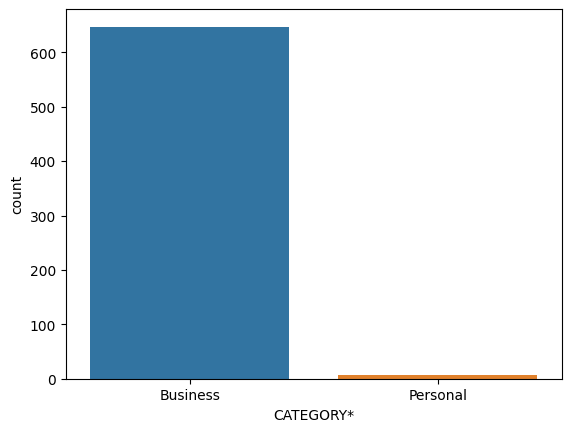

In [11]:
sns.countplot(x='CATEGORY*',data=data)

Getting the miles covered by the drivers

<Axes: ylabel='Frequency'>

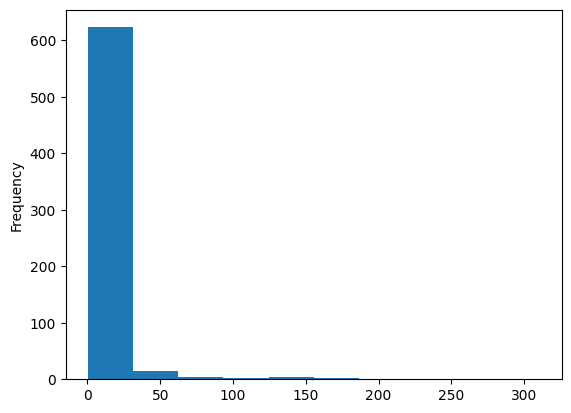

In [12]:
data['MILES*'].plot.hist()

Analysing on which hour of the day maximum trips takes place

Text(0.5, 1.0, 'Number of trips Vs hours')

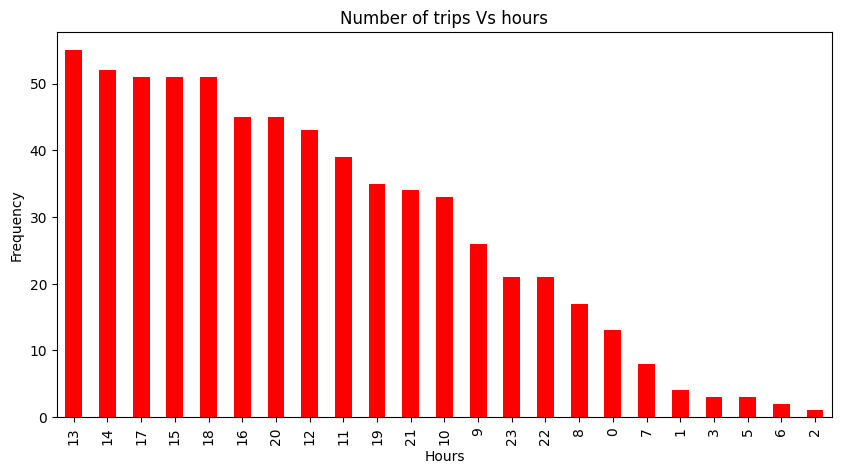

In [13]:
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

Getting the Purpose of Ride and their numbers in bar chart

<Axes: >

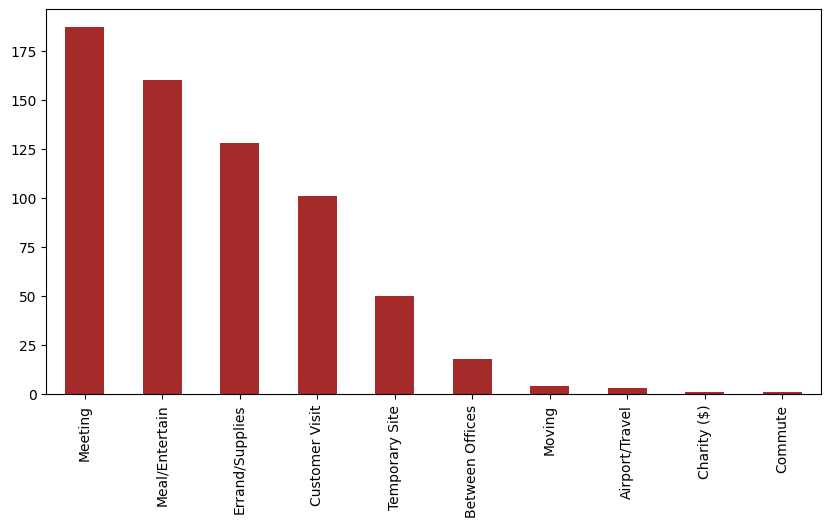

In [14]:
data['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

Analysing on which day of the week maximum trips takes place

<Axes: >

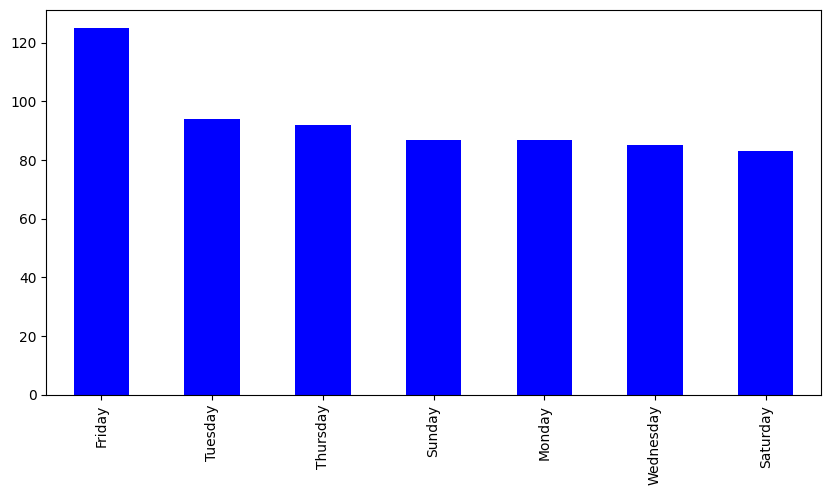

In [15]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

Analysing on which day of the month maximum trips takes place

<Axes: >

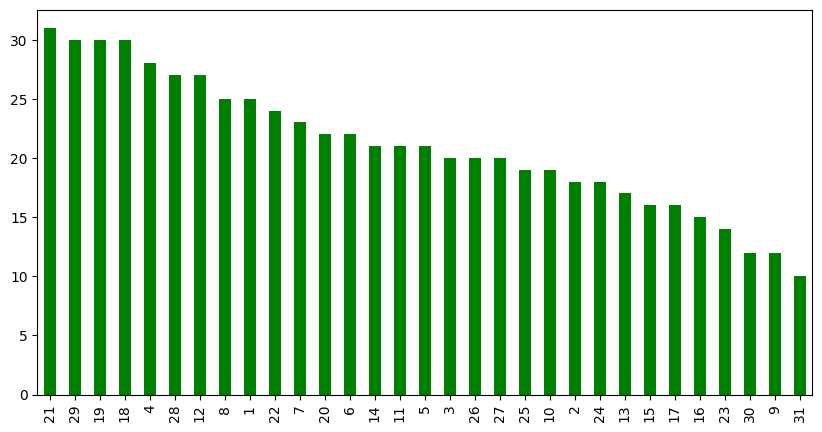

In [16]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='green')

Analysing on which month in a year maximum trips takes place

<Axes: >

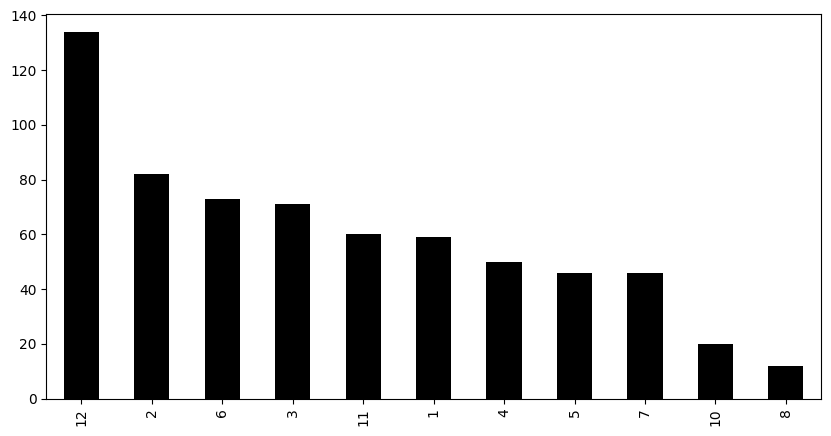

In [17]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

Analysing from which place maximum trips have began.

<Axes: >

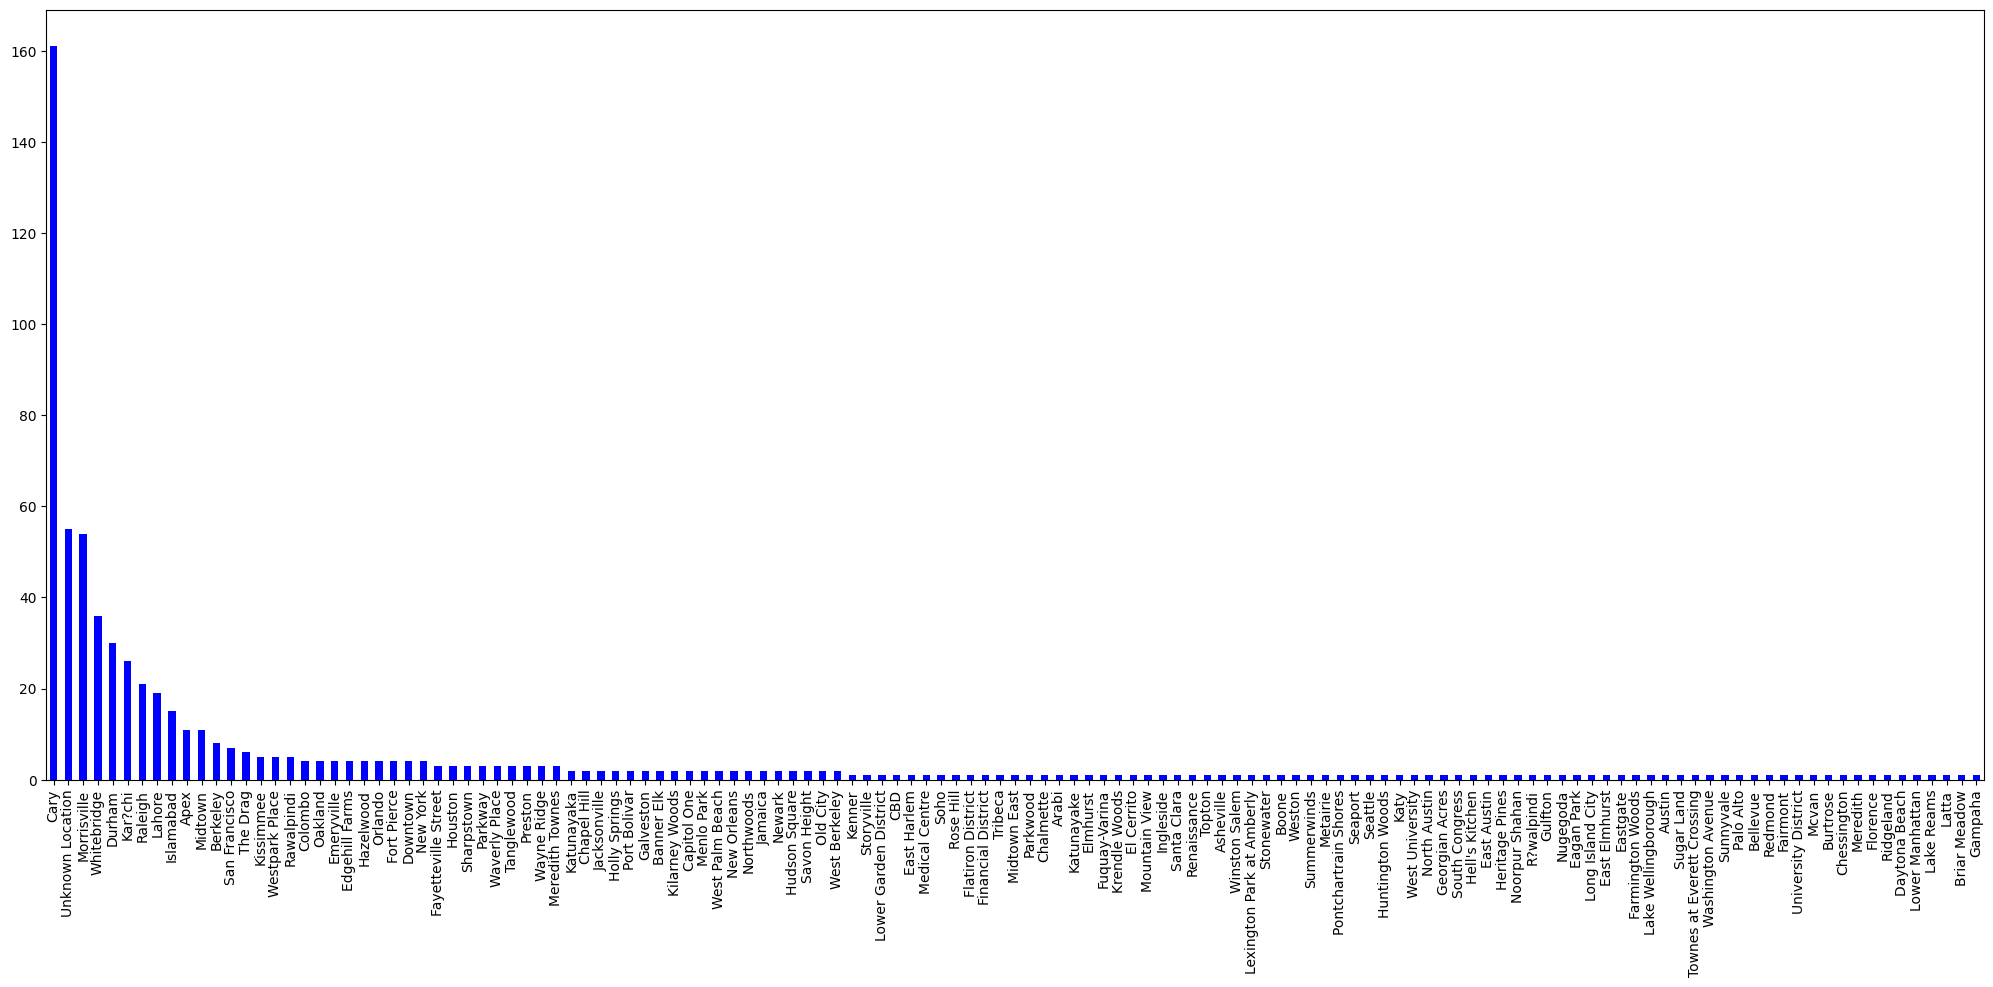

In [29]:
data['START*'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')

Analysing from which place maximum trips have ended.

<Axes: >

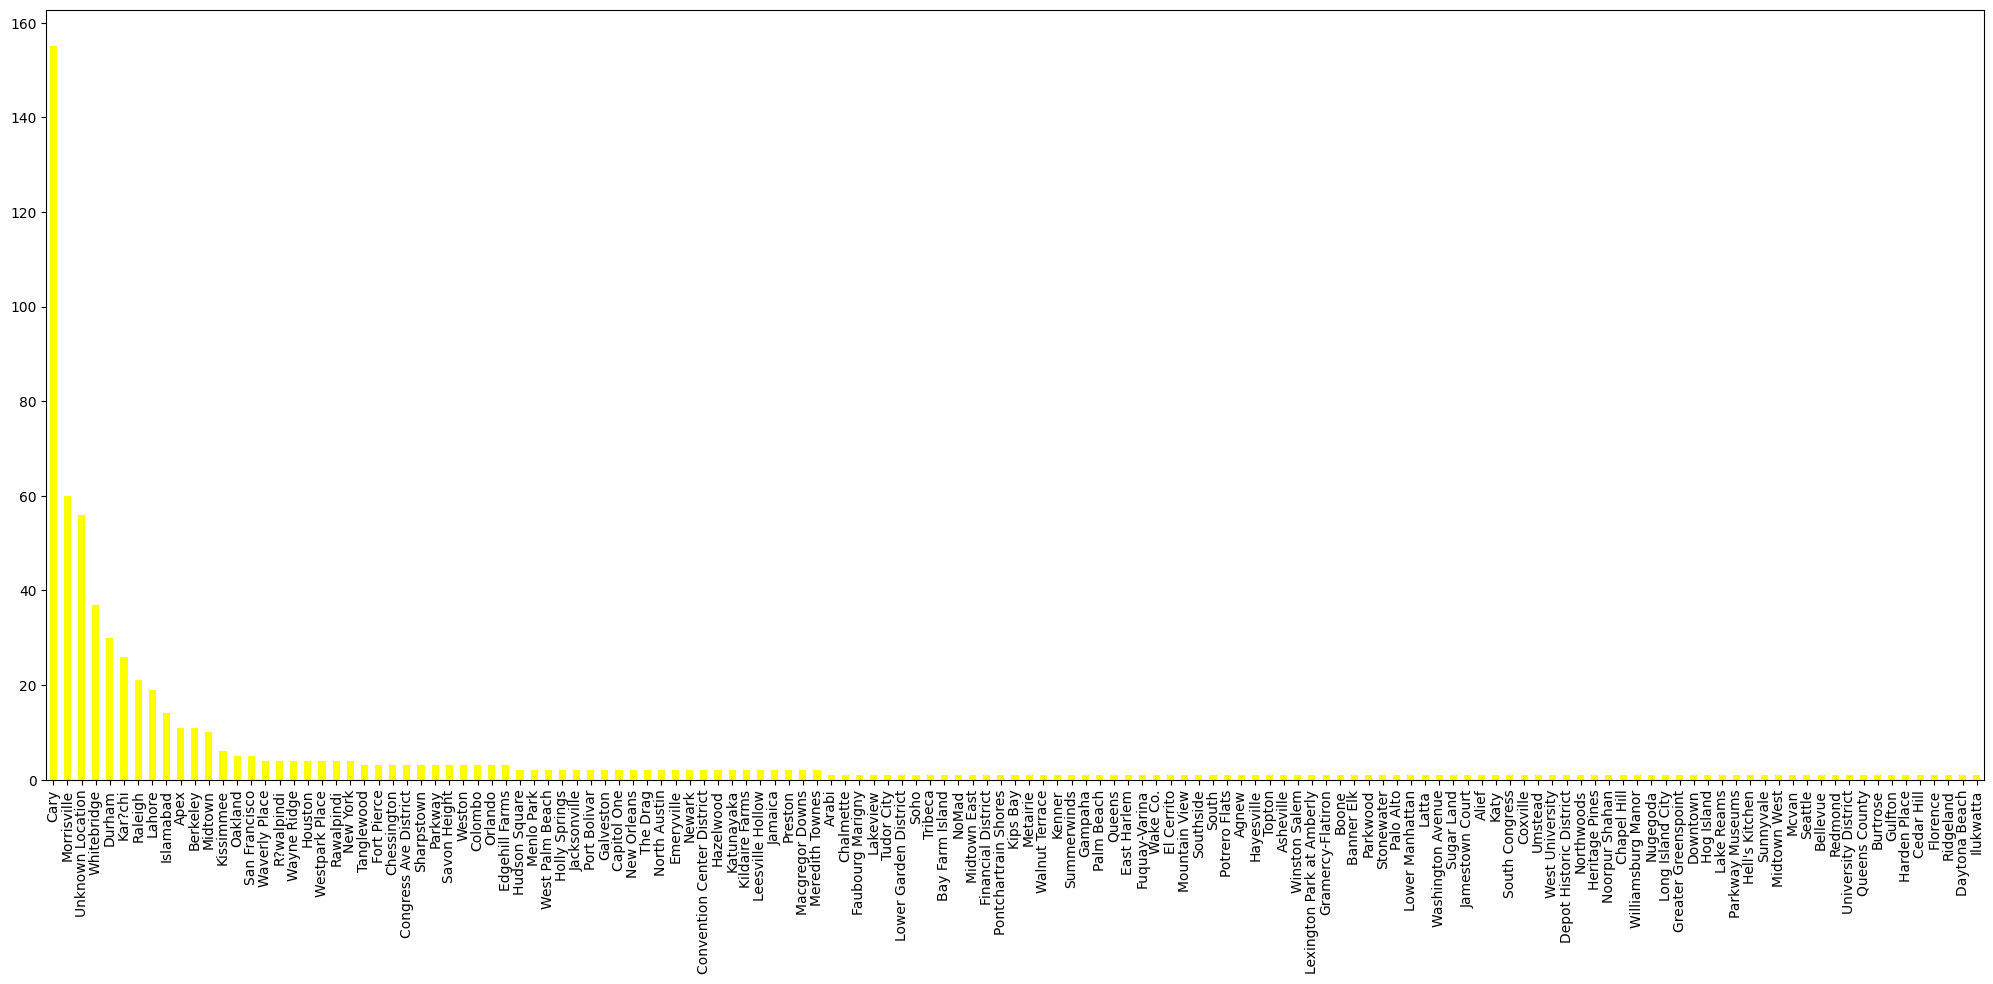

In [30]:
data['STOP*'].value_counts().plot(kind='bar',figsize=(25,10),color='Yellow')

#From our data analysis from the data set we come to know that

Most people in this dataset starts their journey from **Cary** followed by some unknown location and then Morrisville.